In [207]:
%matplotlib inline
import numpy as np
from pylab import *
from astropy.io import fits
from statsmodels.robust import scale
from sklearn import preprocessing as pp

# import time
from IPython import display


In [197]:
from ipywidgets import widgets
from IPython.display import display

In [206]:
mask0   = fits.open('NRCNRCALONG-DARK-53421914341_1_485_SE_2015-12-08T21h45m34_mask.fits')
darks0  = fits.open('NRCNRCALONG-DARK-53421914341_1_485_SE_2015-12-08T21h45m34.fits')

In [437]:
quirks_store  = np.loadtxt('quirks_FINAL_for_cnaw_mask_CV3_dark_frames.txt')
classes_store = np.loadtxt('myclasses_new_FINAL_for_cnaw_mask_CV3_dark_frames.txt').astype(int)

Check If All Class 1 Bad Pixels Are Indeed Just Noisy Pixels
---

In [180]:
quirks_store[classes_store == 1].shape

(706, 108)

Is this a Noisy Pixel? 


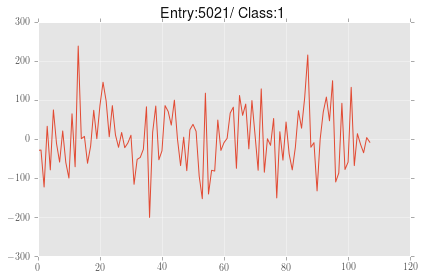

In [238]:
fig = figure()#figsize=(6,6))
ax  = fig.add_subplot(111)
# ax.plot([nan,nan])
corrections = []
for cnow in np.where(classes_store == 1)[0]:
    # ax.lines.pop()
    ax.clear()
    ax.plot(quirks_store[cnow] - median(quirks_store[cnow]))
    ax.set_title('Entry:' + str(cnow) + '/ Class:' + str(classes_store[cnow]))
    fig.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    checkClass = input('Is this a Noisy Pixel? ');
    if checkClass != '':
        corrections.append([cnow, checkClass])
# for cnow in np.where(classes_store == 1)[0]:
#     plt.plot(quirks_store[cnow])
#     display.clear_output(wait=True)
#     display.display(plt.gcf())
#     checkClass = input('Is this a Noisy Pixel? ');print(checkClass)
#     plt.clf()
#     display.clear_output(wait=True)

Check If All Class 4 Bad Pixels Are Indeed Just CR Pixels
---

In [244]:
quirks_store[classes_store == 4].shape

(706, 108)

RuntimeError: dvipng was not able to process the following file:
/Users/jonathanfraine/.matplotlib/tex.cache/15e5b0fbc69d8c0e928a78be26900be9.dvi
Here is the full report generated by dvipng: 



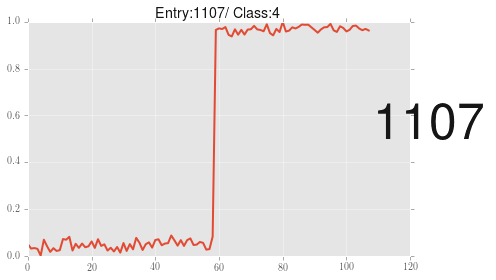

In [303]:
fig = figure()#figsize=(6,6))
ax  = fig.add_subplot(111)

CRs = np.where(classes_store == 4)[0]
corrections = []
for cnow in :
    # ax.lines.pop()
    ax  = fig.add_subplot(111)
    ax.plot((quirks_store[cnow] - min(quirks_store[cnow])) / (max(quirks_store[cnow]) - min(quirks_store[cnow])), lw=2)
    ax.set_title('Entry:' + str(cnow) + '/ Class:' + str(classes_store[cnow]))
    ax.annotate(str(cnow), [110, 0.5], fontsize=50)
    fig.canvas.draw()
    display.display(plt.gcf())
    time.sleep(.05)
    display.clear_output(wait=True)
    ax.lines.pop()
    ax.texts.pop()
    if cnow > 500 and cnow < 1000:
        display.display(plt.clf())
        ax = fig.add_subplot(111)
#     checkClass = input('Is this a Cosmic Ray? ');
#     if checkClass != '':
#         corrections.append([cnow, checkClass])
# for cnow in np.where(classes_store == 1)[0]:
#     plt.plot(quirks_store[cnow])
#     display.clear_output(wait=True)
#     display.display(plt.gcf())
#     checkClass = input('Is this a Noisy Pixel? ');print(checkClass)
#     plt.clf()
#     display.clear_output(wait=True)

In [255]:
corrections

[[140, '2'], [266, '260'], [382, '-382']]

In [264]:
np.where(classes_store == 4)[0][69]

380

In [268]:
classes_store[[140,260, 380]] = 2

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


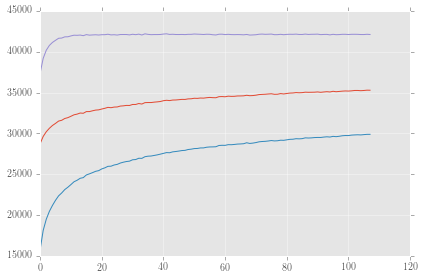

In [265]:
plot(quirks_store[140])
plot(quirks_store[260])
plot(quirks_store[380])

In [289]:
((quirks_store.T - np.min(quirks_store,axis=1)) / (np.max(quirks_store,axis=1) - np.min(quirks_store, axis=1))).shape

(108, 5042)

In [307]:
((quirks_store.T - np.min(quirks_store,axis=1)) / (np.max(quirks_store,axis=1) - np.min(quirks_store, axis=1))).T[classes_store == 4].T.shape

(108, 703)

In [338]:
np.sum(classes_store == 2) // 100

36

In [354]:
quirk_store_norm = ((quirks_store.T - np.min(quirks_store,axis=1)) / (np.max(quirks_store,axis=1) - np.min(quirks_store, axis=1))).T

In [357]:
quirksNow = quirk_store_norm[classes_store == classNow][k*stepsize:(k+1)*stepsize].T
quirksNow.shape

(108, 50)

In [370]:
classes_store_bak = np.copy(classes_store)

In [375]:
classNow  = 5
stepsize  = 50
fig = figure(figsize=(16,30))
for k in range( np.sum(classes_store == classNow) // stepsize):
    quirksNow = quirk_store_norm[classes_store == classNow][k*stepsize:(k+1)*stepsize]
#     upper     = np.where(quirksNow[:,-1] > 0.5)[0]
    lower     = np.where(quirksNow[:,-1] < 0.5)[0]
    classes_store[classes_store == classNow][lower] = np.ones(len(classes_store[classes_store == classNow][lower]))*6
#     ax = fig.add_subplot(np.int(np.ceil(np.sum(classes_store == classNow) // stepsize / 2)), 2, k+1)
#     plot(quirksNow[lower].T);

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


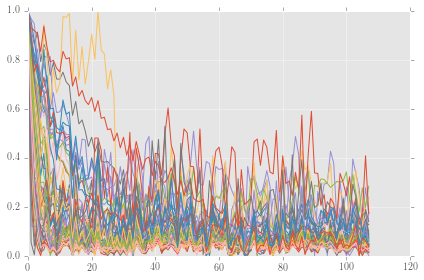

In [439]:
plot(quirk_store_norm[classes_store == 6].T);

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


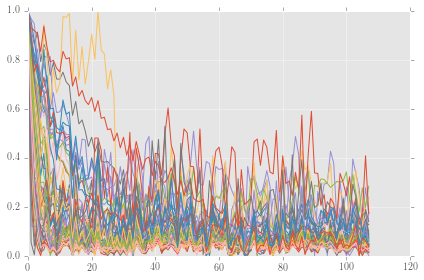

In [440]:
plot(quirk_store_norm[classes_store_new == 6].T);

In [34]:
mask  = mask0[0].data[0]
darks = darks0[0].data

nQuirks     = sum(mask != 0)
nFrames     = darks.shape[0]
nCols,nRows = darks.shape[1:]

In [94]:
med_darkImage = np.median(darks,axis=0)

In [100]:
darks.shape, med_darkImage.shape

((108, 2048, 2048), (2048, 2048))

In [ ]:
darks_reshape = darks.reshape()
pp.

In [112]:
std_med_darkImage = np.std(darks - med_darkImage,axis=0)
mad_med_darkImage = scale.mad(darks - med_darkImage,axis=0)

In [143]:
# fig = figure(figsize=(16,16))
queries = transpose(darks,axes=(1,2,0))[mad_med_darkImage > 1.25*mean(mad_med_darkImage)]

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


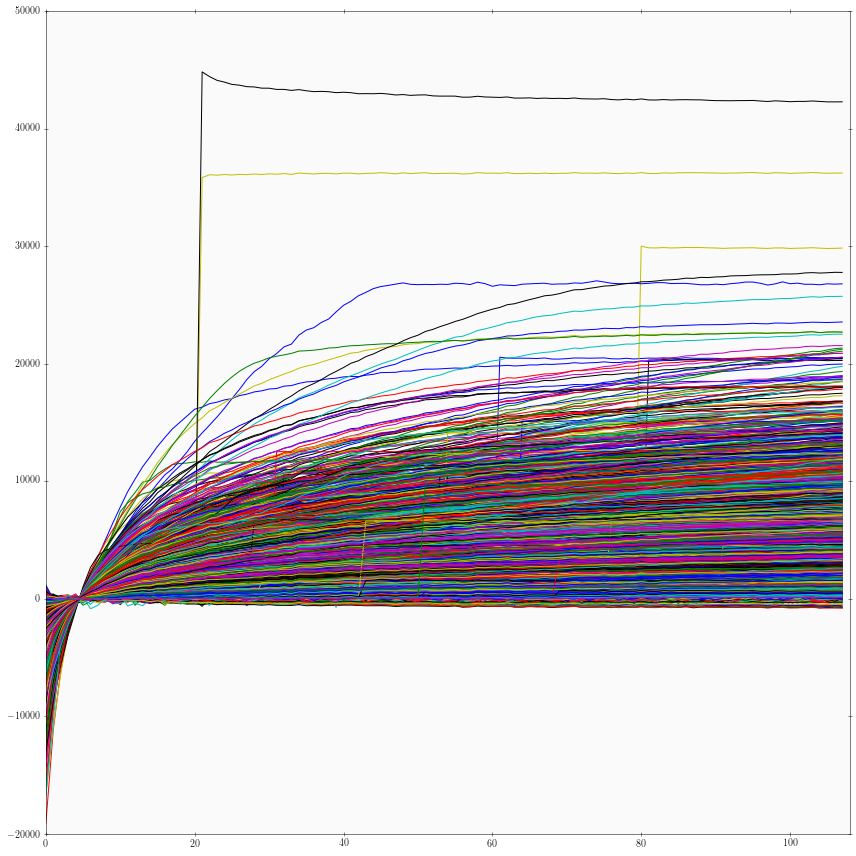

In [170]:
fig = figure(figsize=(12,12))
ax  = fig.add_subplot(111)
ax.plot(queries.T - median(queries[:,:10],axis=1));
ax.set_xlim(0,108);
# ax.set_ylim(0,2**16);

In [64]:
quirks = np.zeros((nQuirks, nFrames))
norms  = np.zeros((nCols*nRows - nQuirks, nFrames))
qCnt   = 0
nCnt   = 0

for icol in range(darks.shape[1]):
    for irow in range(darks.shape[2]):
        if mask[icol,irow] != 0:
            # quirky.append(darks[:,icol,irow])
            quirks[qCnt]  = darks[:,icol,irow]
            qCnt          = qCnt + 1
            assert(qCnt <= nQuirks)
        else:
            norms[nCnt]   = darks[:,icol,irow]
            # normy.append(darks[:,icol,irow])
            nCnt          = nCnt + 1

In [78]:
norms.shape

(4189262, 108)

In [83]:
np.median(norms[randUse],axis=1).shape

(1000,)

In [348]:
np.median(norms[randUse],axis=1).shape

(1000,)

(-1, 110)

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


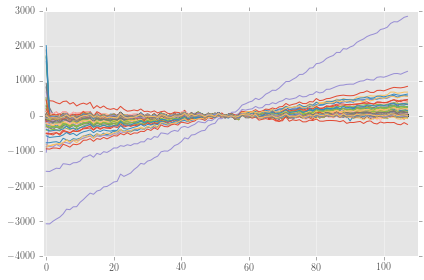

In [353]:
nDisplay = 100000
randUse  = np.random.randint(0,nCols*nRows - nQuirks,nDisplay)
plot((norms[randUse].T - np.median(norms[randUse],axis=1)));
xlim(-1,110);